In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import math as mt
import datetime as dt
import random as ran
from sklearn.metrics.pairwise import euclidean_distances as euc

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

from src.dbc import TimeDivisionKMeans
from src.dbc.utils import data_preprocessing, dimension_reduction, calc_contribution

In [3]:
# 1. load_excel
data_path = "data/apt_1.xlsx"
xlsx = pd.read_excel(data_path, header=None,
                     skiprows=2, engine="openpyxl")

# 2. data preprocessing
df = data_preprocessing(xlsx)

# 3. dimension_reduction
df = dimension_reduction(df)

# 4. day clustering
copy_df = df.copy()

In [18]:
# 4. day clustering
df = copy_df[:24 * 31]
size = 3
tdKMeans = TimeDivisionKMeans(df, size=size)

df.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2018-05-01 00:00:00,0.341,0.121,0.245,0.009,0.085,0.154,0.161,0.311,0.358,0.177,...,0.372,0.181,0.322,0.374,0.571,0.453,0.161,0.127,0.259,0.364
2018-05-01 01:00:00,0.337,0.186,0.285,0.010,0.071,0.127,0.179,0.225,0.206,0.178,...,0.245,0.238,0.292,0.382,0.327,0.352,0.172,0.133,0.234,0.286
2018-05-01 02:00:00,0.324,0.214,0.487,0.009,0.061,0.139,0.182,0.221,0.150,0.152,...,0.245,0.250,0.287,0.320,0.359,0.366,0.242,0.219,0.197,0.368
2018-05-01 03:00:00,0.319,0.250,0.300,0.009,0.067,0.132,0.172,0.274,0.142,0.205,...,0.177,0.223,0.329,0.170,0.322,0.267,0.269,0.164,0.229,0.414
2018-05-01 04:00:00,0.235,0.199,0.107,0.009,0.047,0.131,0.153,0.255,0.139,0.169,...,0.129,0.171,0.301,0.168,0.351,0.255,0.170,0.132,0.198,0.318


In [25]:
tdKMeans.init_setting()
hc, ci = tdKMeans.run()

hc.head()

1 / 248 ==> 86.00974473356658
2 / 248 ==> 85.46951338088127
3 / 248 ==> 81.52013041153054
4 / 248 ==> 82.25615068462724
5 / 248 ==> 83.8977955820689
6 / 248 ==> 82.71752812558049
7 / 248 ==> 80.68832532170804
8 / 248 ==> 84.43826385348164
9 / 248 ==> 87.24608318431729
10 / 248 ==> 86.58474924551979
11 / 248 ==> 81.20215248589022
12 / 248 ==> 84.45418322122617
13 / 248 ==> 87.01749481796348
14 / 248 ==> 81.31521215456297
15 / 248 ==> 81.7045335483966
16 / 248 ==> 80.79876385095986
17 / 248 ==> 89.71871147395372
18 / 248 ==> 87.75441614815908
19 / 248 ==> 80.19753610789257
20 / 248 ==> 81.13360745069357
21 / 248 ==> 81.18123471772047
22 / 248 ==> 83.706404488731
23 / 248 ==> 81.84339238838606
24 / 248 ==> 85.18704894125449
25 / 248 ==> 86.59115173184367
26 / 248 ==> 87.47680479454615
27 / 248 ==> 80.74371680006949
28 / 248 ==> 82.00255347717706
29 / 248 ==> 82.85766969541193
30 / 248 ==> 82.23135506571295
31 / 248 ==> 76.4747208777446
32 / 248 ==> 84.34444035105652
33 / 248 ==> 86.086946

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
0,0.0,4.0,2.0,6.0,6.0,4.0,4.0,5.0,5.0,4.0,...,5.0,2.0,5.0,0.0,0.0,0.0,4.0,4.0,2.0,0.0
1,2.0,2.0,6.0,0.0,0.0,4.0,4.0,1.0,4.0,2.0,...,4.0,6.0,5.0,4.0,5.0,1.0,6.0,6.0,6.0,5.0
2,3.0,3.0,3.0,5.0,5.0,3.0,0.0,3.0,3.0,0.0,...,5.0,6.0,6.0,1.0,2.0,1.0,0.0,0.0,1.0,1.0
3,4.0,4.0,4.0,4.0,4.0,6.0,6.0,6.0,0.0,4.0,...,4.0,0.0,3.0,1.0,1.0,1.0,4.0,3.0,6.0,1.0
4,5.0,4.0,4.0,4.0,4.0,5.0,0.0,0.0,2.0,5.0,...,2.0,2.0,2.0,2.0,3.0,0.0,4.0,0.0,0.0,1.0


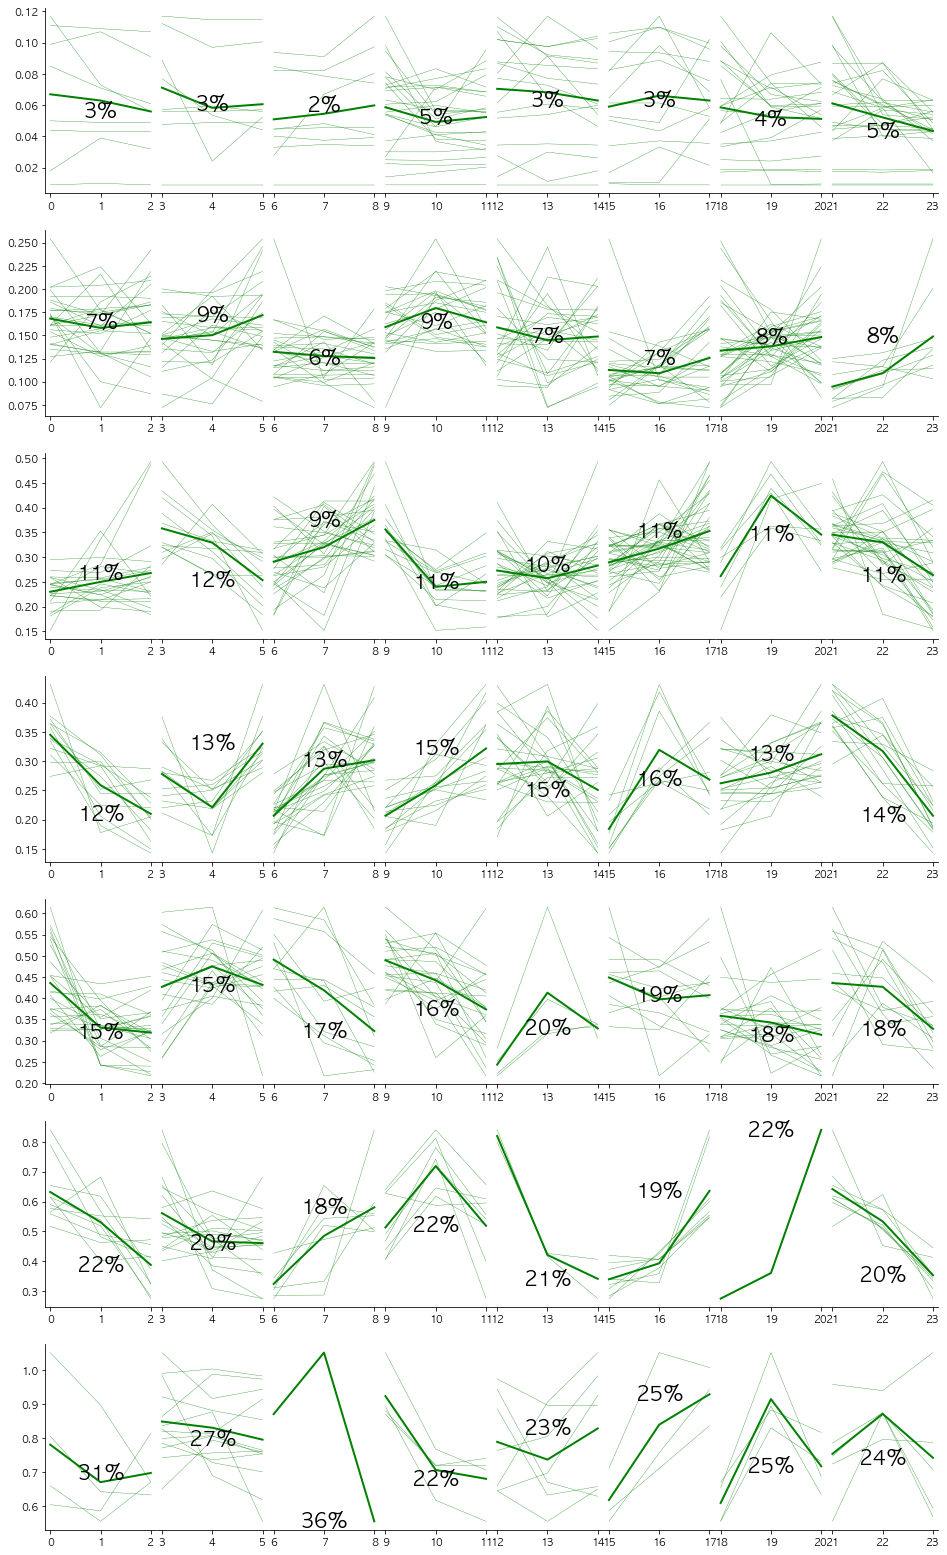

In [34]:
# 전체
_sort_ci = list()
cluster_pattern = np.array([])
fig,ax = plt.subplots(len(ci[0][0]), len(ci[:8]), figsize=(16,4 * len(ci[0][0])))
fig.subplots_adjust(wspace=0.01)

for rank in range(0, len(ci[0][0])):
    for ci_idx, _ci in enumerate(ci[:8]):
        _min_idx = _ci[1].argsort()[rank]
        _contribution = _ci[1][_min_idx]
        _cluster_pattern = _ci[0][_min_idx]

        household_ci = hc.iloc[ci_idx].values
        _in_cluster = np.where(household_ci == _min_idx)
        in_cluster = df.columns[_in_cluster]

        households_patterns = df[in_cluster].T.values
        x = [_ for _ in range(size * ci_idx, size * (ci_idx + 1))]

        for hp in households_patterns:
            ax[rank][ci_idx].plot(range(size * ci_idx, size * (ci_idx + 1)), hp[
                size * ci_idx: size * (ci_idx + 1)
            ], color="g", linewidth=0.3)
        
        ax[rank][ci_idx].plot(range(size * ci_idx, size * (ci_idx + 1)),_cluster_pattern, color="g", linewidth=2)

        ax[rank][ci_idx].spines['right'].set_visible(False)
        ax[rank][ci_idx].spines['top'].set_visible(False)
        
        ax[rank][ci_idx].text(x[mt.floor(size / 2)],_cluster_pattern[mt.ceil(size / 2)], 
                              "{}%".format(int(_contribution)) ,
                             fontsize=20,
                             fontweight='semibold',
                             verticalalignment ='center', 
                             horizontalalignment ='center')

        if ci_idx > 0:
            ax[rank][ci_idx].spines['left'].set_visible(False)
            ax[rank][ci_idx].yaxis.set_ticks([])
            ax[rank][ci_idx].yaxis.set_ticklabels([])

In [27]:
test = pd.DataFrame(df.values.reshape(-1, 3, 108).sum(axis=1),
                    columns=df.columns)
test.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
0,1.002,0.521,1.017,0.028,0.217,0.420,0.522,0.757,0.714,0.507,...,0.862,0.669,0.901,1.076,1.257,1.171,0.575,0.479,0.690,1.018
1,0.723,0.587,0.708,0.027,0.153,0.419,0.511,0.802,0.452,0.489,...,0.527,0.632,0.938,0.534,1.029,0.775,0.660,0.642,0.655,1.061
2,0.541,0.375,0.392,0.027,0.111,0.541,0.924,0.658,0.575,0.780,...,0.335,1.807,1.597,1.116,1.275,1.343,1.015,0.790,1.324,1.249
3,0.540,0.485,0.194,0.028,0.385,0.794,0.905,0.839,1.677,0.446,...,0.459,1.863,0.925,1.259,1.319,1.455,0.409,0.935,0.835,1.381
4,0.597,0.380,0.272,0.027,0.283,0.637,0.899,0.775,1.338,0.493,...,1.033,1.322,1.084,1.172,1.724,0.899,0.394,0.747,0.702,1.772


In [28]:
contribution_df = calc_contribution(hc, ci, test)

new!


In [30]:
# 실제(합산치 상에서의) 최소, 최대 사용량 가구
cols = df.columns

sum_df = (df.sum() * 1000).round() / 1000
min_h = cols[sum_df.argmin()]
max_h = cols[sum_df.argmax()]
print("실제 (합산치 상에서의) 최소, 최대 사용량 가구")
print("- 최소: {} ({}kwh) / 최대: {} ({}kwh)\n".format(
    min_h,
    sum_df[min_h],
    max_h,
    sum_df[max_h]
))

mean_cont_df = contribution_df.mean().round().astype("int")
_min_h = cols[mean_cont_df.argmin()]
_max_h = cols[mean_cont_df.argmax()]
print("기여도 최소, 최대 사용량 가구")
print("- 최소: {} ({}kwh) (기여도: {}%) / 최대: {} ({}kwh) (기여도: {}%)\n".format(
    _min_h,
    sum_df[min_h],
    mean_cont_df[_min_h],
    _max_h,
    sum_df[max_h],
    mean_cont_df[_max_h]
))
print("- 최소사용량 가구 기여도 , 최대사용량 가구 기여도 비교 {}배".format(round(mean_cont_df[_max_h] / mean_cont_df[_min_h])))

실제 (합산치 상에서의) 최소, 최대 사용량 가구
- 최소: 아파트1-104-1208 (6.743kwh) / 최대: 아파트1-103-703 (454.151kwh)

기여도 최소, 최대 사용량 가구
- 최소: 아파트1-104-1208 (6.743kwh) (기여도: 3%) / 최대: 아파트1-103-703 (454.151kwh) (기여도: 22%)

- 최소사용량 가구 기여도 , 최대사용량 가구 기여도 비교 7배


In [47]:
sum_df = df.sum().round()
cont_mean_df = contribution_df.sum()

In [48]:
for col in df:
    _me = sum_df[col]
    targets = sum_df[sum_df > _me].index
    
    for t_col in targets:
        _target = sum_df[t_col]
        me_cont = cont_mean_df[col]
        t_cont = cont_mean_df[t_col]
        
        if me_cont > t_cont:
            print(col, t_col,_me, _target ,me_cont, t_cont)

아파트1-104-303 아파트1-103-1602 150.0 154.0 1931.0 1917.0
아파트1-104-303 아파트1-101-1502 150.0 156.0 1931.0 1850.0
아파트1-104-303 아파트1-103-602 150.0 152.0 1931.0 1914.0
아파트1-104-303 아파트1-101-404 150.0 152.0 1931.0 1892.0
아파트1-104-1307 아파트1-104-203 161.0 164.0 2046.0 2033.0
아파트1-103-1402 아파트1-103-301 216.0 218.0 2674.0 2641.0
아파트1-103-402 아파트1-102-704 224.0 225.0 2833.0 2817.0
아파트1-103-402 아파트1-102-1602 224.0 228.0 2833.0 2779.0
아파트1-103-402 아파트1-102-401 224.0 232.0 2833.0 2738.0
아파트1-103-801 아파트1-103-1302 189.0 193.0 2286.0 2280.0
아파트1-103-502 아파트1-102-104 292.0 301.0 3644.0 3633.0
아파트1-103-1602 아파트1-101-1502 154.0 156.0 1917.0 1850.0
아파트1-103-202 아파트1-101-402 305.0 312.0 3791.0 3758.0
아파트1-103-202 아파트1-103-1104 305.0 312.0 3791.0 3769.0
아파트1-103-202 아파트1-103-106 305.0 330.0 3791.0 3766.0
아파트1-103-202 아파트1-102-404 305.0 306.0 3791.0 3756.0
아파트1-102-603 아파트1-103-1201 196.0 200.0 2441.0 2370.0
아파트1-102-203 아파트1-101-1102 255.0 258.0 3226.0 3145.0
아파트1-102-203 아파트1-101-901 255.0 261.0 3226.0 3215.0
아

In [36]:
contribution_df.index = df.index[::size]

contribution_df.head()

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
2018-05-01 00:00:00,15.0,7.0,11.0,3.0,3.0,6.0,7.0,12.0,12.0,7.0,...,12.0,11.0,12.0,15.0,15.0,15.0,7.0,7.0,11.0,15.0
2018-05-01 03:00:00,12.0,12.0,13.0,3.0,3.0,8.0,9.0,15.0,9.0,11.0,...,9.0,13.0,20.0,9.0,20.0,15.0,13.0,13.0,13.0,20.0
2018-05-01 06:00:00,6.0,5.0,5.0,2.0,2.0,6.0,9.0,6.0,6.0,9.0,...,2.0,18.0,18.0,13.0,16.0,13.0,9.0,9.0,13.0,13.0
2018-05-01 09:00:00,5.0,5.0,5.0,5.0,5.0,9.0,9.0,9.0,22.0,5.0,...,5.0,22.0,11.0,16.0,16.0,16.0,5.0,11.0,9.0,16.0
2018-05-01 12:00:00,7.0,3.0,3.0,3.0,3.0,7.0,10.0,10.0,15.0,6.0,...,14.0,15.0,15.0,15.0,23.0,10.0,3.0,10.0,10.0,21.0


In [37]:
DAY_ARR = ["월", "화", "수", "목", "금", "토", "일"]
day_np = [_ for _ in range(0,7)]

for _day in range(0, 7):
    _day_np = contribution_df.loc[contribution_df.index.weekday == _day].values
    day_np[_day] = _day_np.mean(axis=0).round()
    
day_np = np.array(day_np)

day_cont_map_df = pd.DataFrame(day_np, 
                               index=["월", "화", "수", "목", "금", "토", "일"],
                              columns=df.columns)

day_cont_map_df

,아파트1-104-1206,아파트1-104-303,아파트1-104-1307,아파트1-104-1208,아파트1-104-408,아파트1-104-203,아파트1-103-1402,아파트1-103-402,아파트1-103-1201,아파트1-103-801,...,아파트1-102-901,아파트1-103-1905,아파트1-103-503,아파트1-103-1504,아파트1-103-606,아파트1-103-903,아파트1-103-1106,아파트1-103-705,아파트1-103-1505,아파트1-103-406
월,8.0,8.0,10.0,3.0,4.0,8.0,10.0,12.0,10.0,10.0,...,11.0,13.0,14.0,12.0,18.0,15.0,9.0,10.0,17.0,14.0
화,8.0,7.0,5.0,3.0,4.0,8.0,10.0,11.0,11.0,9.0,...,9.0,15.0,13.0,12.0,20.0,13.0,10.0,9.0,15.0,15.0
수,8.0,7.0,6.0,3.0,4.0,8.0,10.0,11.0,10.0,9.0,...,10.0,14.0,15.0,11.0,20.0,12.0,10.0,9.0,14.0,13.0
목,8.0,8.0,8.0,3.0,4.0,9.0,11.0,12.0,9.0,9.0,...,10.0,14.0,16.0,12.0,20.0,12.0,11.0,8.0,13.0,14.0
금,9.0,8.0,9.0,3.0,6.0,8.0,11.0,11.0,8.0,9.0,...,10.0,13.0,15.0,12.0,19.0,13.0,10.0,10.0,16.0,15.0
토,9.0,8.0,10.0,3.0,3.0,9.0,12.0,12.0,10.0,10.0,...,12.0,15.0,14.0,13.0,21.0,13.0,10.0,9.0,17.0,18.0
일,9.0,8.0,10.0,3.0,4.0,8.0,11.0,12.0,8.0,9.0,...,11.0,12.0,13.0,12.0,21.0,14.0,10.0,9.0,18.0,15.0


In [38]:
mean_cont_map = contribution_df.mean().round().astype("int")

In [39]:
cols = day_cont_map_df.columns
mean_cont_map = day_cont_map_df.mean().round().astype("int")
sort_mean_cont_map = mean_cont_map.argsort()

sort_cols = cols[sort_mean_cont_map]
sort_cont = mean_cont_map[sort_mean_cont_map]

In [40]:
x,y  = np.histogram(sort_cont,bins=9)

min_min_y = y[0]
min_max_y = y[3]
median_min_y = y[4]
median_max_y = y[6]
max_min_y = y[7]
max_max_y = y[9]

min_idxes = np.where((sort_cont >= min_min_y) & (sort_cont <= min_max_y))[0]
min_idx = min_idxes[
    ran.randrange(0, len(min_idxes))
]

min_cont = sort_cont[min_idx]
min_col = sort_cols[min_idx]
min_pat = df[min_col][df[min_col].index.weekday == 0].values.reshape(-1,24)

median_idxes = np.where((sort_cont >= median_min_y) & (sort_cont <= median_max_y))[0]
median_idx = median_idxes[
    ran.randrange(0, len(median_idxes))
]

median_cont = sort_cont[median_idx]
median_col = sort_cols[median_idx]
median_pat = df[median_col][df[median_col].index.weekday == 0].values.reshape(-1,24)

median_idxes = np.where((sort_cont >= median_min_y) & (sort_cont <= median_max_y))[0]
median_idx = median_idxes[
    ran.randrange(0, len(median_idxes))
]

median_cont = sort_cont[median_idx]
median_col = sort_cols[median_idx]
median_pat = df[median_col][df[median_col].index.weekday == 0].values.reshape(-1,24)



max_idxes = np.where((sort_cont >= max_min_y) & (sort_cont <= max_max_y))[0]
max_idx = max_idxes[
    ran.randrange(0, len(max_idxes))
]
max_cont = sort_cont[max_idx]
max_col = sort_cols[max_idx]

가구 A의 사용량은 258.0kWh이며, 가구 B의 사용량은 13.0kWh 입니다.
가장 차이가 많이 나는 요일은 토요일 입니다.


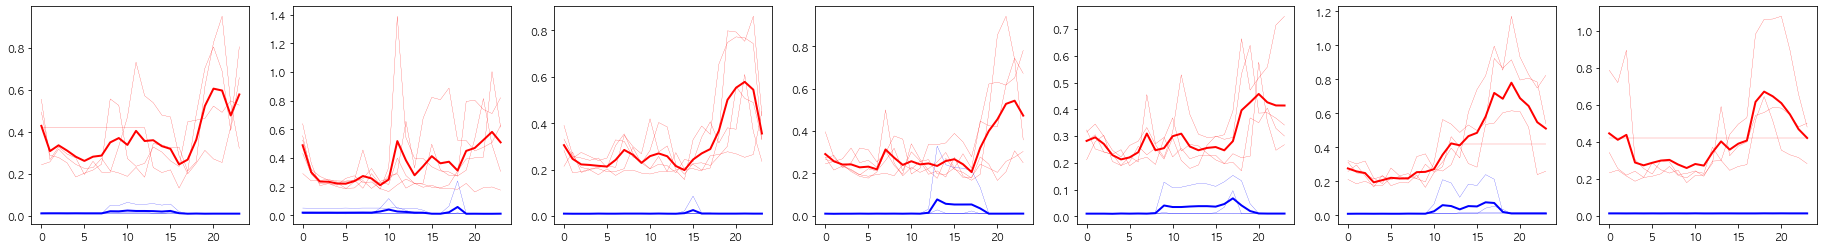

In [41]:
fig, ax = plt.subplots(1, 7, figsize=(32,4))

max_err_weekday = 0
max_err = 0 

A = median_col
B = min_col

A_day = day_cont_map_df[A]
B_day = day_cont_map_df[B]

for day,_m1 in enumerate(A_day):
    _m2 = B_day[day]
    
    _pat_1 = df[A][df[A].index.weekday == day].values.reshape(-1,24)
    _pat_2 = df[B][df[B].index.weekday == day].values.reshape(-1,24)

    for pat_idx, pat_1 in enumerate(_pat_1):
        pat_2 = _pat_2[pat_idx]
        ax[day].plot(pat_1, color='r', linewidth=0.2)
        ax[day].plot(pat_2, color='b', linewidth=0.2)

    ax[day].plot(_pat_1.mean(axis=0), color='r', linewidth=2)
    ax[day].plot(_pat_2.mean(axis=0), color='b', linewidth=2)
    
    err = _m1 - _m2
    if err > max_err:
        max_err_weekday = day
        max_err =err
    
print("가구 A의 사용량은 {}kWh이며, 가구 B의 사용량은 {}kWh 입니다.".format(
    df[A].sum().round(),
    df[B].sum().round()
))
print("가장 차이가 많이 나는 요일은 {}요일 입니다.".format(DAY_ARR[max_err_weekday]))
plt.show()

가구 A의 사용량은 419.0kWh이며, 가구 B의 사용량은 258.0kWh 입니다.
가장 차이가 많이 나는 요일은 수요일 입니다.


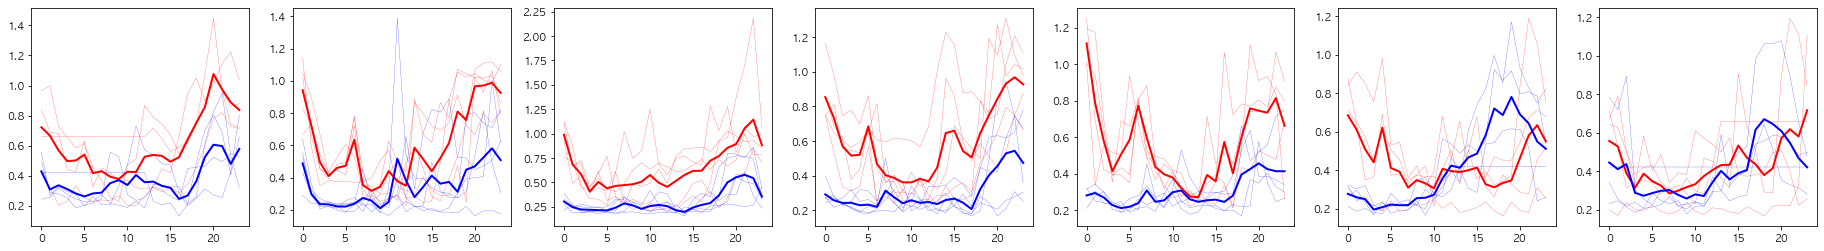

In [42]:
fig, ax = plt.subplots(1, 7, figsize=(32,4))

max_err_weekday = 0
max_err = 0 

A = max_col
B = median_col

A_day = day_cont_map_df[A]
B_day = day_cont_map_df[B]

for day,_m1 in enumerate(A_day):
    _m2 = B_day[day]
    
    _pat_1 = df[A][df[A].index.weekday == day].values.reshape(-1,24)
    _pat_2 = df[B][df[B].index.weekday == day].values.reshape(-1,24)

    for pat_idx, pat_1 in enumerate(_pat_1):
        pat_2 = _pat_2[pat_idx]
        ax[day].plot(pat_1, color='r', linewidth=0.2)
        ax[day].plot(pat_2, color='b', linewidth=0.2)

    ax[day].plot(_pat_1.mean(axis=0), color='r', linewidth=2)
    ax[day].plot(_pat_2.mean(axis=0), color='b', linewidth=2)
    
    err = _m1 - _m2
    if err > max_err:
        max_err_weekday = day
        max_err =err
    
print("가구 A의 사용량은 {}kWh이며, 가구 B의 사용량은 {}kWh 입니다.".format(
    df[max_col].sum().round(),
    df[median_col].sum().round()
))
print("가장 차이가 많이 나는 요일은 {}요일 입니다.".format(DAY_ARR[max_err_weekday]))
plt.show()

월    8.0
화    7.0
수    7.0
목    8.0
금    8.0
토    8.0
일    8.0
Name: 아파트1-104-303, dtype: float64
월    8.0
화    7.0
수    7.0
목    7.0
금    8.0
토    8.0
일    8.0
Name: 아파트1-101-1502, dtype: float64
가구 A의 사용량은 150.0kWh이며, 가구 B의 사용량은 156.0kWh 입니다.
가장 차이가 많이 나는 요일은 목요일 입니다.


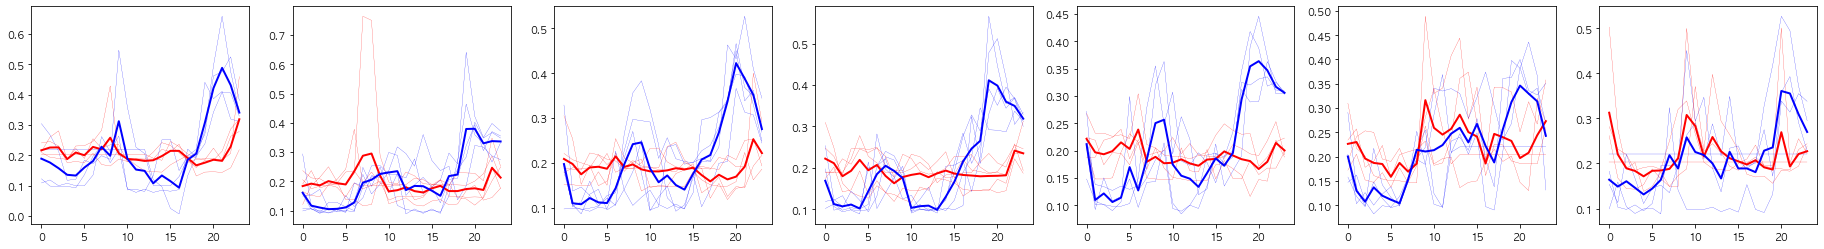

In [49]:
fig, ax = plt.subplots(1, 7, figsize=(32,4))

max_err_weekday = 0
max_err = 0 

A = "아파트1-104-303"
B = "아파트1-101-1502"

A_day = day_cont_map_df[A]
B_day = day_cont_map_df[B]

for day,_m1 in enumerate(A_day):
    _m2 = B_day[day]
    
    _pat_1 = df[A][df[A].index.weekday == day].values.reshape(-1,24)
    _pat_2 = df[B][df[B].index.weekday == day].values.reshape(-1,24)

    for pat_idx, pat_1 in enumerate(_pat_1):
        pat_2 = _pat_2[pat_idx]
        ax[day].plot(pat_1, color='r', linewidth=0.2)
        ax[day].plot(pat_2, color='b', linewidth=0.2)

    ax[day].plot(_pat_1.mean(axis=0), color='r', linewidth=2)
    ax[day].plot(_pat_2.mean(axis=0), color='b', linewidth=2)
    
    err = _m1 - _m2
    if err > max_err:
        max_err_weekday = day
        max_err =err
    
print(A_day)
print(B_day)
print("가구 A의 사용량은 {}kWh이며, 가구 B의 사용량은 {}kWh 입니다.".format(
    df[A].sum().round(),
    df[B].sum().round()
))
print("가장 차이가 많이 나는 요일은 {}요일 입니다.".format(DAY_ARR[max_err_weekday]))
plt.show()